In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist
from tensorflow.math import confusion_matrix
%matplotlib inline

In [7]:
(x_train, y_train), (x_test, ytest) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
y_train[0]

9

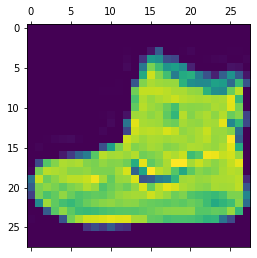

In [12]:
plt.matshow(x_train[0])

In [15]:
val = set(y_train)
val

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [16]:
x_train = x_train / 255
x_test = x_test / 255

In [51]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [52]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']    
)

In [53]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4925 - accuracy: 0.8229
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3695 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3373 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3142

In [54]:
model.evaluate(x_test, ytest)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 3s 7ms/step - loss: 0.3355 - accuracy: 0.8821


[0.33550235629081726, 0.882099986076355]

In [55]:
y_predicted = model.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 2s 5ms/step


In [56]:
y_predicted[0]

array([1.9165715e-07, 2.3022314e-07, 4.7795152e-07, 1.0115786e-09,
       1.2014432e-07, 2.4866784e-04, 1.6157729e-06, 7.9866266e-03,
       1.9019549e-06, 9.9176019e-01], dtype=float32)

In [57]:
np.argmax(y_predicted[0])

9

In [58]:
ytest[0]

9

In [59]:
y_predicted_label = [np.argmax(i) for i in y_predicted]

In [60]:
ytest[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [61]:
y_predicted_label[:5]

[9, 2, 1, 1, 6]

In [62]:
cm = confusion_matrix(ytest, y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[815,   5,  24,  31,   1,   1, 118,   0,   5,   0],
       [  1, 972,   2,  21,   2,   0,   1,   0,   1,   0],
       [ 14,   0, 831,  16,  70,   0,  66,   0,   3,   0],
       [ 13,   9,   9, 920,  12,   0,  32,   0,   5,   0],
       [  1,   3, 128,  58, 749,   0,  56,   0,   5,   0],
       [  0,   0,   0,   0,   0, 963,   0,  21,   1,  15],
       [123,   1,  89,  40,  62,   0, 676,   0,   9,   0],
       [  0,   0,   0,   0,   0,  16,   0, 964,   0,  20],
       [  3,   0,   3,   3,   6,   3,   3,   3, 976,   0],
       [  0,   0,   0,   0,   0,   4,   1,  40,   0, 955]])>

Text(69.0, 0.5, 'Truth')

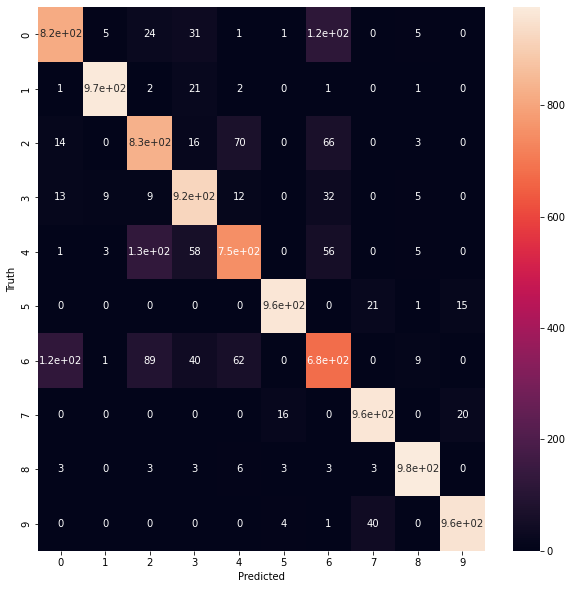

In [63]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')